In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Least Squares Regression

## Finding line of best for single independent variable

$$y = 4x + 5 + noise$$

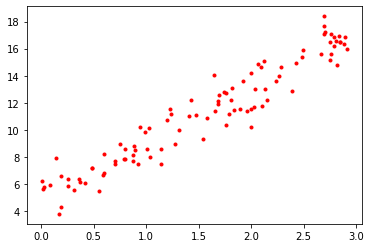

In [2]:
# generation of test data
X = 3 * np.random.rand(100, 1) # ~(100, 1)
y = 5 + 4 * X + np.random.randn(100, 1) # ~(100, 1)
plt.plot(X, y, '.r')

$$ c = \bar{y} - m \bar{x} $$
$$ m = \frac{ \sum{ (x_i y_i - \bar{y} x_i) }}{ \sum{ (x_i^2 - \bar{x} x_i) }}$$

In [3]:
def get_regression_params(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    m = np.sum((x*y) - (y_mean*x)) / np.sum((x**2) - (x_mean*x))
    c = y_mean - m * x_mean
    return m, c

In [4]:
get_regression_params(X, y)

(4.074164851983236, 4.913608168237393)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[4.07416485]]), array([4.91360817]))

## Finding line of best fit in multiple regression by normal equation

$$y = 4x_1 - 2x_2 + 7 + noise$$

We need to assume $\hat{y} = \hat{\theta_0} x_0 + \hat{\theta_1} x_1 + \hat{\theta_2} x_2 $, where $x_0 = 1$

If $m$ is the number of samples and $n$ is the number of features, then:
$y$ is $m \times 1$, $X$ is $m \times (n+1)$, $\hat{\theta}$ is $(n+1) \times 1$

In [6]:
# generation of test data
x1 = 10 * np.random.rand(100, 1) # ~ (100, 1), values in range[0,10]
x2 = 10 * np.random.rand(100, 1) # ~ (100, 1), values in range[0,10]
y = 4 * x1 - 2 * x2 + 7 + np.random.randn(100, 1) # ~(100, 1)
# plt.plot(X, y, '.r')
X = np.column_stack((np.ones((100, 1)), x1, x2))
X.shape # (m,n+1) = (100, 2+1)

(100, 3)

$$\mathbf {\hat{\theta}} = (X^T X)^{-1} X^T \mathbf y $$



In [7]:
theta_cap = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
theta_cap

array([[ 7.39757762],
       [ 3.95621227],
       [-2.01372358]])

# Gradient Descent

## Linear regression by gradient descent method

$$y = 4x + 5 + noise$$

Let us assume, $\hat{y} = h_\theta (x_{i}) = \hat{\theta_0} x_0 + \hat{\theta_1} x_1 $, where $x_0 = 1$

Then, $$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$$

In [8]:
# generation of test data
x = 3 * np.random.rand(100, 1) # ~(100, 1)
y = 5 + 4 * x + np.random.randn(100, 1) # ~(100, 1)

$$\theta_i := \theta_i - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x) - y_{i}) x_i $$

In [9]:
theta0, theta1 = 0,0
learning = 0.01
m = len(x)
for i in range(1000):
    d_0 = np.sum((theta0 + x * theta1) - y)
    d_1 = np.sum(((theta0 + x * theta1) - y) * x)
    theta0 = theta0 - d_0 * (learning / m)
    theta1 = theta1 - d_1 * (learning / m)
theta0, theta1

(4.54557706003431, 4.163732054080782)

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(x, y) 
sgd_reg.intercept_, sgd_reg.coef_

(array([4.59502557]), array([4.13968976]))

## Multiple regression by gradient descent

$$y = 4x_1 - 2x_2 + 7 + noise$$

We need to assume $\hat{y} = \hat{\theta_0} x_0 + \hat{\theta_1} x_1 + \hat{\theta_2} x_2 $, where $x_0 = 1$

If $m$ is the number of samples and $n$ is the number of features, then:
$y$ is $m \times 1$, $X$ is $m \times (n+1)$, $\hat{\theta}$ is $(n+1) \times 1$

In [11]:
# generation of test data
x1 = 10 * np.random.rand(100, 1) # ~ (100, 1), values in range[0,10]
x2 = 10 * np.random.rand(100, 1) # ~ (100, 1), values in range[0,10]
y = 4 * x1 - 2 * x2 + 7 + np.random.randn(100, 1) # ~(100, 1)
# plt.plot(X, y, '.r')
X = np.column_stack((np.ones((100, 1)), x1, x2))
X.shape # (m,n+1) = (100, 2+1)

(100, 3)

$$J(\theta) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (X_i) - y_{i} \right)^2$$

$$ 
\nabla_\theta J(\theta) 
= 
\begin{pmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\ 
... \\ 
\frac{\partial J(\theta)}{\partial \theta_n}
\end{pmatrix}
=
\frac{1}{m} X^T(X \theta - y) 
$$

In [12]:
eta = 0.01 # learning rate (try different values like 0.02 and 0.5)
n_iterations = 2000 # use 10 for drawing the lines
m = len(X)

theta = np.zeros((3,1)) # random initialization
for iteration in range(n_iterations):
    gradients = 1/m * X.T.dot(X.dot(theta) - y)
    theta -= eta * gradients

theta

array([[ 6.25534321],
       [ 4.12638208],
       [-1.97463571]])